<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">
  <div style="font-size:150%; color:#FEE100"><b>Predictive Maintenance Analysis and Classification</b></div>
  <div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div>
</div>

This analysis embarks on a journey into machine predictive maintenance data. The dataset may reveal interesting relationships between operating conditions and machine failure modes. If you find this notebook useful, please upvote.

## Table of Contents

- [Data Import](#Data-Import)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering and Correlation Analysis](#Feature-Engineering-and-Correlation-Analysis)
- [Predictive Modeling](#Predictive-Modeling)
- [Conclusion](#Conclusion)

In [38]:
# Importing necessary libraries and suppressing warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Set backend for matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Set a random seed for reproducibility
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

## Data Import

In this section we import the machine predictive maintenance dataset. The data file is located in the same directory as the notebook.

In [39]:
# Load the dataset
data_path = 'predictive_maintenance.csv'
df = pd.read_csv(data_path, encoding='UTF-8-SIG')

# Display the first few rows to get a sense of the data structure
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


## Data Cleaning and Preprocessing

Here we perform data cleaning and simple preprocessing. The primary goal is to understand if there are any missing values and verify that each column is of the correct type. Note that no date columns are included here, so date parsing is not required.

For other notebook creators facing similar issues, always consider inspecting the data types when reading in files to ensure consistency and detect any type mismatches.

In [40]:
# Check the data types of each column
print(df.dtypes)

# Check for missing values in each column
print(df.isnull().sum())

# Optionally, convert any columns that need to be categorical
categorical_cols = ['Product ID', 'Type', 'Failure Type']
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Verify the changes
df.info()

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Target                       int64
Failure Type                object
dtype: object
UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   UDI                      10000 non-null  int64   
 1   Product ID               10000 non-null  category
 2   

## Exploratory Data Analysis

Here we explore the relationships within the data. We look at the distribution of various features, compute summary statistics, and create a pair plot for a visual correlation overview.

The dataset has several numeric columns, so we construct a correlation heatmap based on only numeric features (UDI, Air temperature, Process temperature, Rotational speed, Torque, Tool wear, and Target) to investigate potential linear relationships.

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


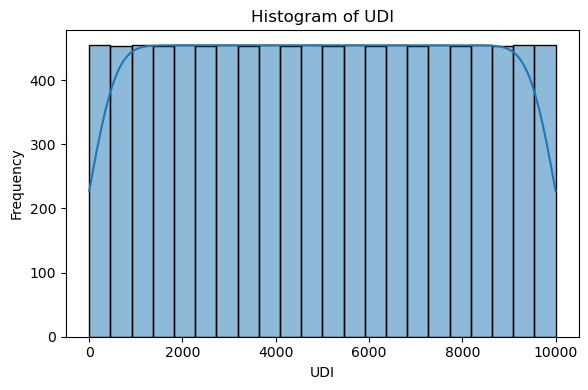

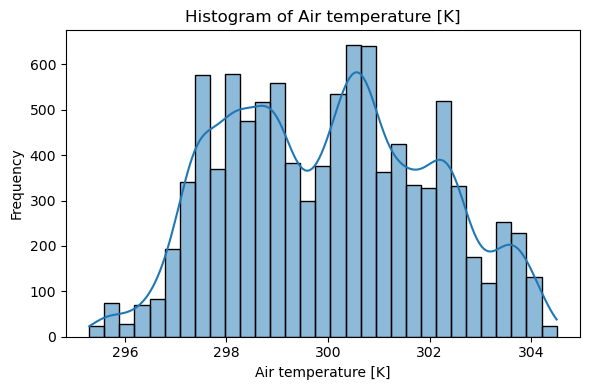

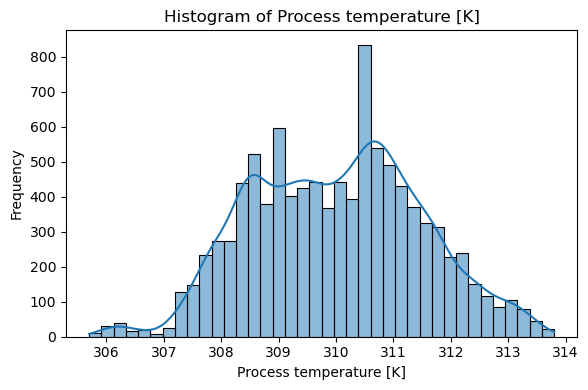

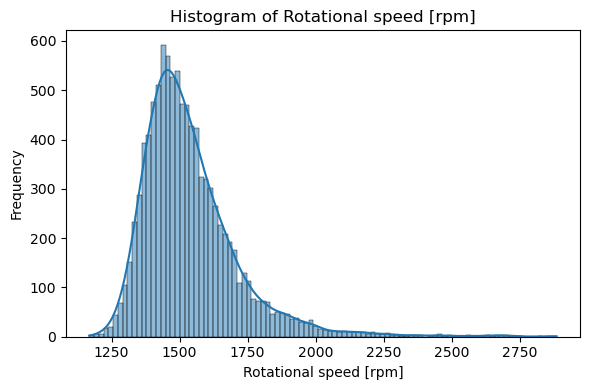

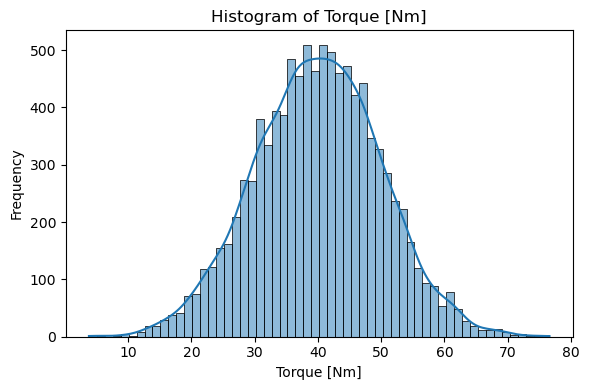

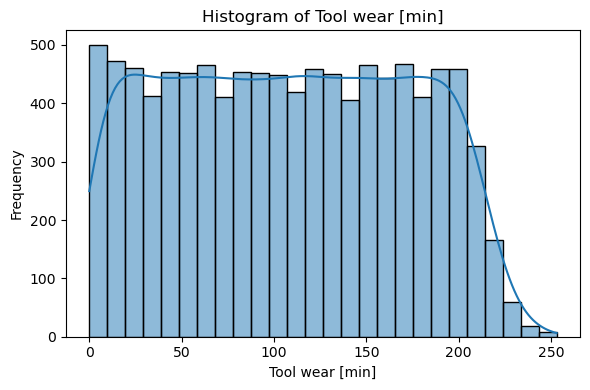

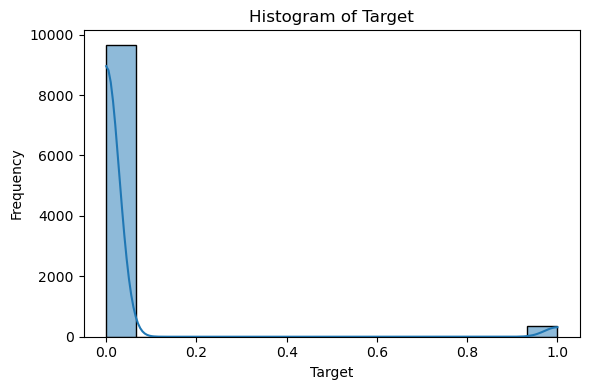

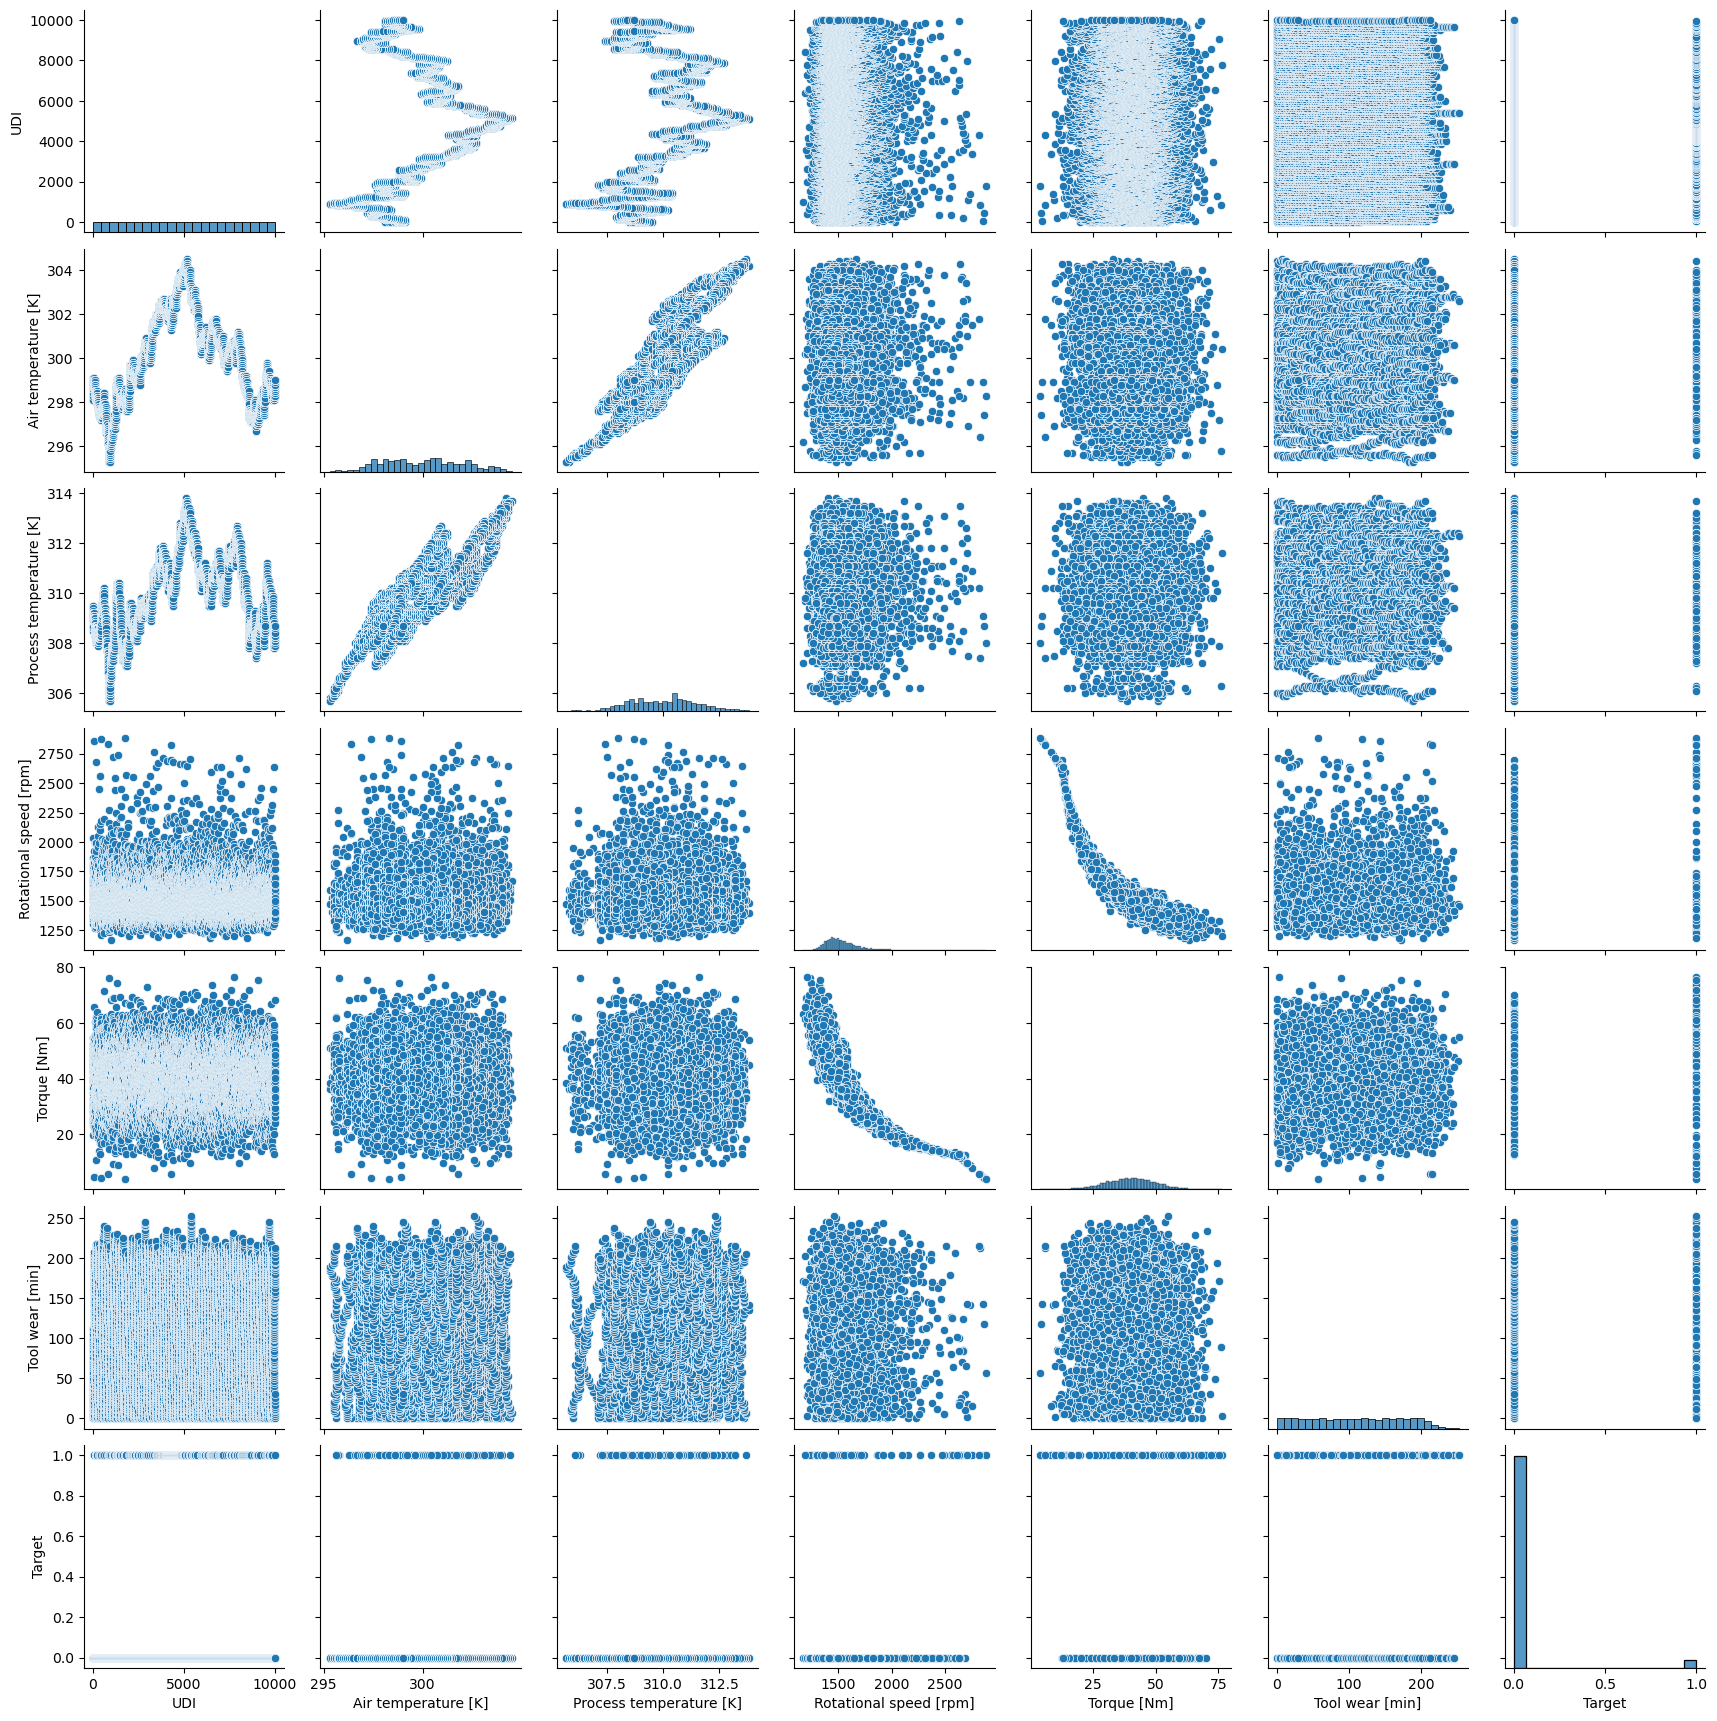

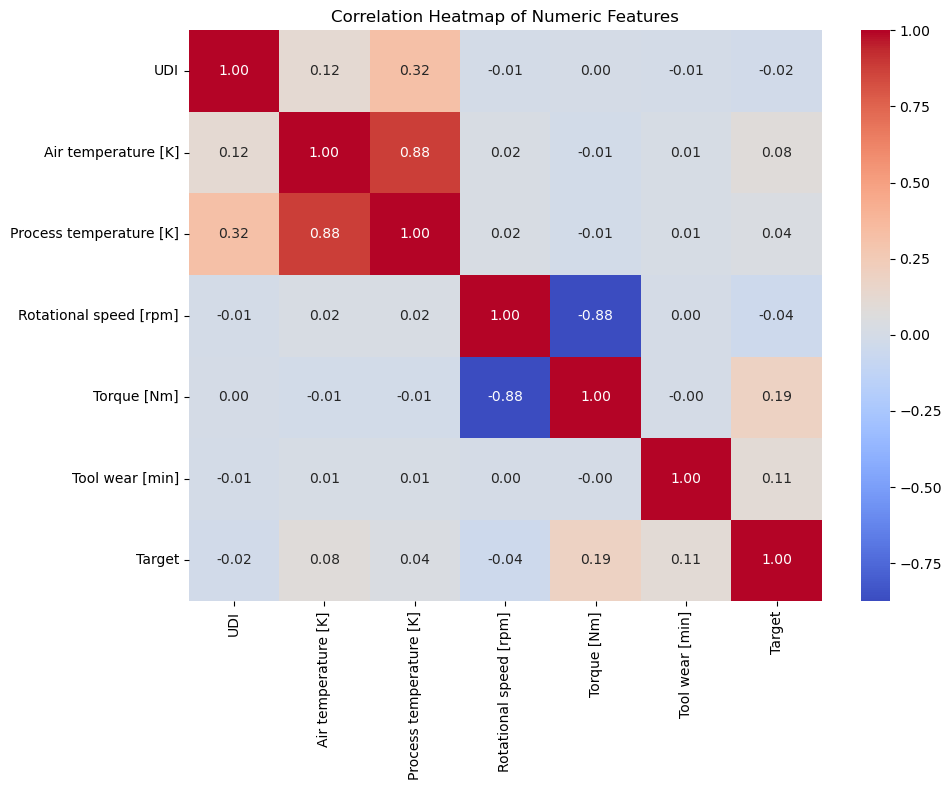

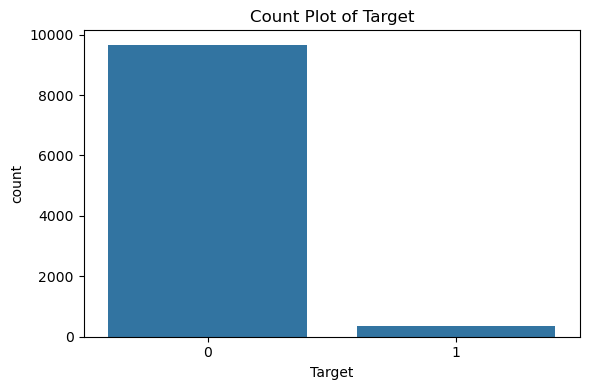

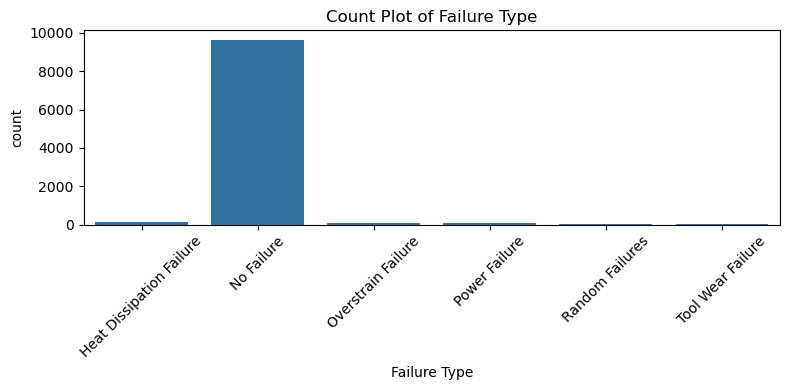

In [41]:
## Summary Statistics
display(df.describe())

## Histograms for numeric variables
numeric_cols = ['UDI', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target']
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Pair Plot
sns.pairplot(df[numeric_cols])
plt.show()

## Correlation Heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a heatmap.')

## Count Plot of the Target Column
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title('Count Plot of Target')
plt.tight_layout()
plt.show()

## Count Plot of Failure Type
plt.figure(figsize=(8, 4))
sns.countplot(x='Failure Type', data=df)
plt.title('Count Plot of Failure Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Feature Engineering and Correlation Analysis

Before modeling, we may need to perform feature engineering. In this notebook, we keep things simple. We encode the categorical features and select the relevant numeric features. The correlation analysis provided earlier informs us which numeric variables have strong associations with the target. For more sophisticated approaches, future work could integrate feature interactions or domain-specific insights.

## Predictive Modeling

Now we proceed with building a simple classifier. We choose to predict the binary target status using a logistic regression model. The data is split into training and testing sets. We apply one-hot encoding for categorical columns and standardize numeric features within a pipeline for better predictive performance. Finally, we evaluate our model using accuracy, a confusion matrix, and an ROC curve.

Accuracy Score: 1.00


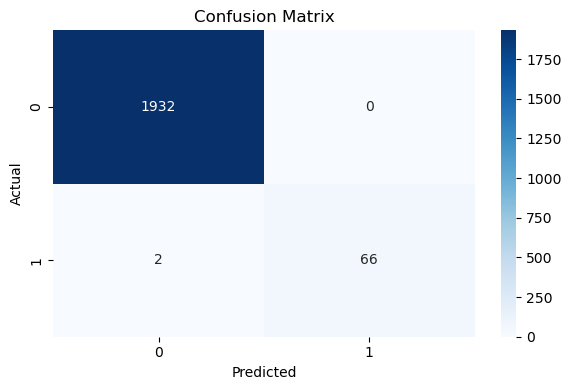

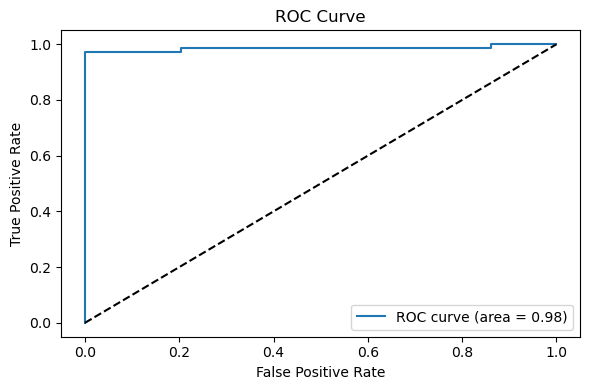

In [42]:
# Prepare features and target
X = df.drop(columns=['Target'])
y = df['Target']

# Drop columns that uniquely identify records and might not be useful
# Here, UDI is an identifier so we drop it
X = X.drop(columns=['UDI'])

# Identify categorical and numeric columns
categorical_features = ['Product ID', 'Type', 'Failure Type']
numeric_features = [col for col in X.columns if col not in categorical_features]

# Create a column transformer to preprocess numeric and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Create a pipeline that first preprocesses the data then fits a logistic regression model
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=RANDOM_SEED, max_iter=1000))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_SEED, stratify=y
)

# Fit the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy:.2f}')

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

# Compute ROC curve and AUC
y_pred_prob = clf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

## Conclusion

In this notebook, we explored machine predictive maintenance data with a focus on cleaning, visualization, and predictive modeling. We built a logistic regression classifier to estimate the failure target with a straightforward preprocessing pipeline and evaluated its performance using accuracy, a confusion matrix, and an ROC curve.

This analysis demonstrates the merits of combining domain understanding with exploratory data analysis and simple predictive modeling techniques. Future work could include more advanced modeling approaches, feature engineering, hyperparameter optimization, and deeper investigations into how different failure types relate to sensor measurements.

If you find this notebook insightful, please consider upvoting it.

In [43]:
# Import the joblib library
import joblib

# The variable 'preprocessor' is your full pipeline including scaling and the model.
# We will save this entire pipeline object.
# This ensures that when we load the model later, it will handle the scaling automatically.
filename = 'predictive_maintenance_pipeline.joblib'
joblib.dump(clf, filename)

print(f"Model pipeline saved to {filename}")

Model pipeline saved to predictive_maintenance_pipeline.joblib
